# Analyzing Stock Performance For AAPL, MSFT, GOOGL (2020-2024)

**Disclaimer** : *All the analysis included are not financial advice, this is for informational purposes only.*

In this project, I analyzed the stock performance of tech giants Apple, Microsoft, and Google. I used simple methods to gain insights into how these stocks performed between 2020 and 2024. The analysis included overall trends, trading volume, correlation analysis, and financial metrics like daily returns and cumulative returns.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import yfinance as yf
from pandas.plotting import scatter_matrix
%matplotlib inline

In [3]:
start_date = '2020-01-01'
end_date = '2024-01-01'

#Getting the data from yahoo finance
apple = yf.download('AAPL', start=start_date, end=end_date)
microsoft = yf.download('MSFT', start=start_date, end=end_date)
google = yf.download('GOOGL', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Opening Price Trend Analysis 

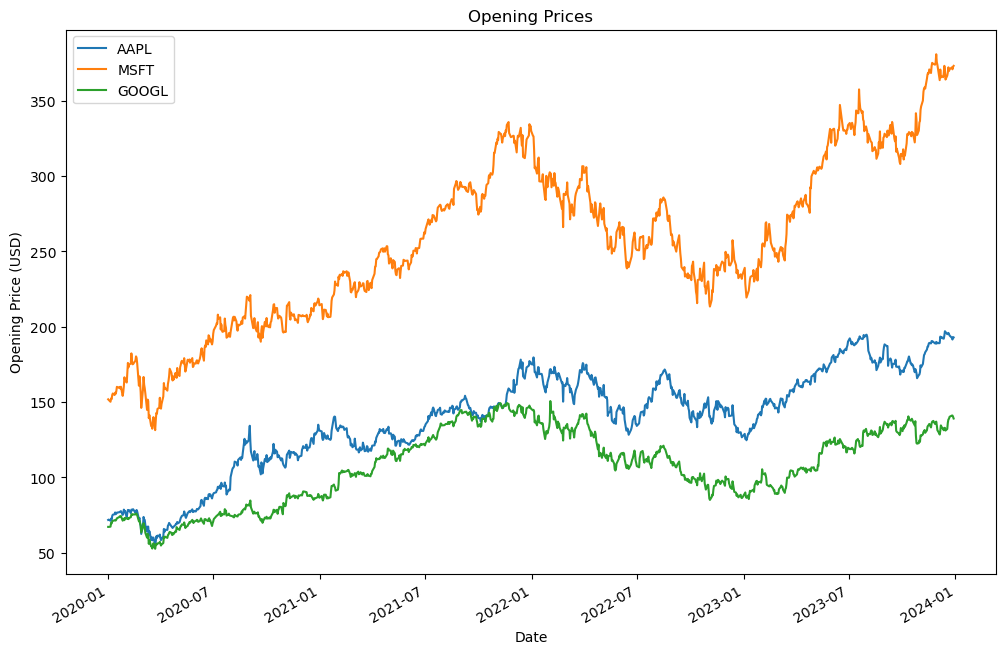

In [7]:
# Opening Prices Plot 

fig, ax = plt.subplots(figsize=(12, 8))  

apple['Open'].plot(ax=ax,label='Apple')  
microsoft['Open'].plot(ax=ax,label='Microsoft')
google['Open'].plot(ax=ax,label='Google')

# Customize the plot
ax.set_title('Opening Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Opening Price (USD)')
ax.legend() 

plt.show()

*We can see that prices fluctuate a lot in the short term, but looking at the overall trend from 2020 to 2024, we can say that it’s an uptrend.*

# Trade Volume 

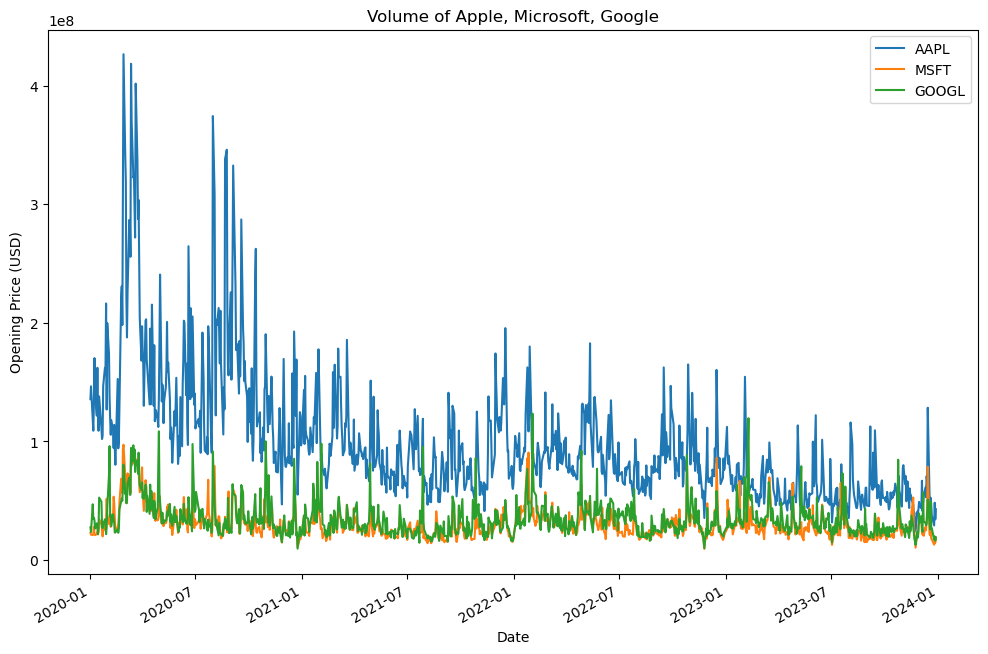

In [11]:
# Volume Plot 

fig, ax = plt.subplots(figsize=(12, 8))  

apple['Volume'].plot(ax=ax, label='Apple')  
microsoft['Volume'].plot(ax=ax, label='Microsoft')
google['Volume'].plot(ax=ax, label='Google')

# Customize the plot
ax.set_title('Volume of Apple, Microsoft, Google')
ax.set_xlabel('Date')
ax.set_ylabel('Opening Price (USD)')
ax.legend() 

plt.show()

# Volume spike breakdown for AAPL 

In [68]:
#let's check out when is the most volume of apple stocks traded ? 

apple['Volume'].idxmax()

Ticker
AAPL   2020-02-28
dtype: datetime64[ns]

*Apple's stock trading volume surged on February 28, 2020, due to market-wide panic selling fueled by COVID-19 fears. Concerns about supply chain disruptions in China and declining iPhone sales added to the volatility.*

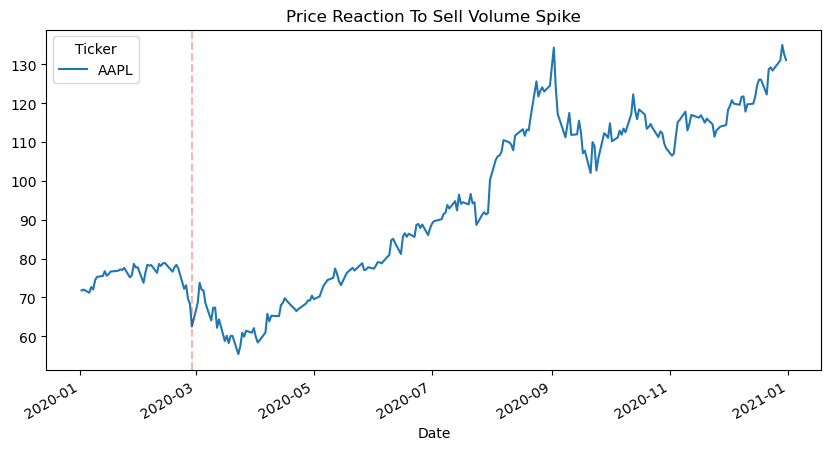

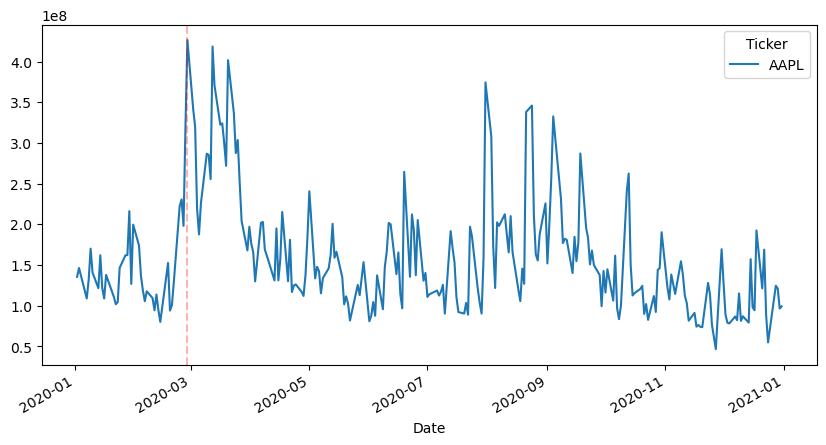

In [250]:
#let's analysis 2022 apple volume and opening price activity 

app_2022 = apple.loc['2020-01-01':'2021-01-01']

# Add a vertical line at the specific date
highlight_date = '2020-02-28'
app_2022['Open'].plot(label='Opening price',title='Price Reaction To Sell Volume Spike', figsize=(10,5)).axvline(x=highlight_date, color='red', linestyle='--',alpha=0.3, label='Sell volume surged')
app_2022['Volume'].plot(label='Volume',figsize=(10,5)).axvline(x=highlight_date, color='red', linestyle='--',alpha=0.3, label='Sell volume surged')
plt.show()

*We can see huge sell off during that volume spike.*

# Market Capitalization Analysis 

Open price time-series analysis makes Microsoft look like it's always been much more valuable than Apple and Google. But stock price alone doesn't state the company's value. We need to consider the marketcap also. Unfortunately don't have market cap data in  dataframes, but can still calculate similar value which is "total money traded". Note that : this is not the actual market cap formula just for visual representation sake.

In [14]:
import pandas as pd

def mcap(tic):
    # Calculate the average price
    avg = (tic['High'] + tic['Low'] + tic['Close']) / 3
    # Get the volume
    vol = tic['Volume']
    # Calculate the market capitalization
    return vol * avg 
    

# Assuming apple, google, microsoft are your dataframes
apple_mcap = mcap(apple)
google_mcap = mcap(google)
microsoft_mcap = mcap(microsoft)

# To check if column names are assigned properly
apple_mcap.head()

Ticker,AAPL
Date,
2020-01-02,9.808691e+09
2020-01-03,1.057440e+10
2020-01-06,8.536434e+09
2020-01-07,7.887802e+09
2020-01-08,9.654747e+09


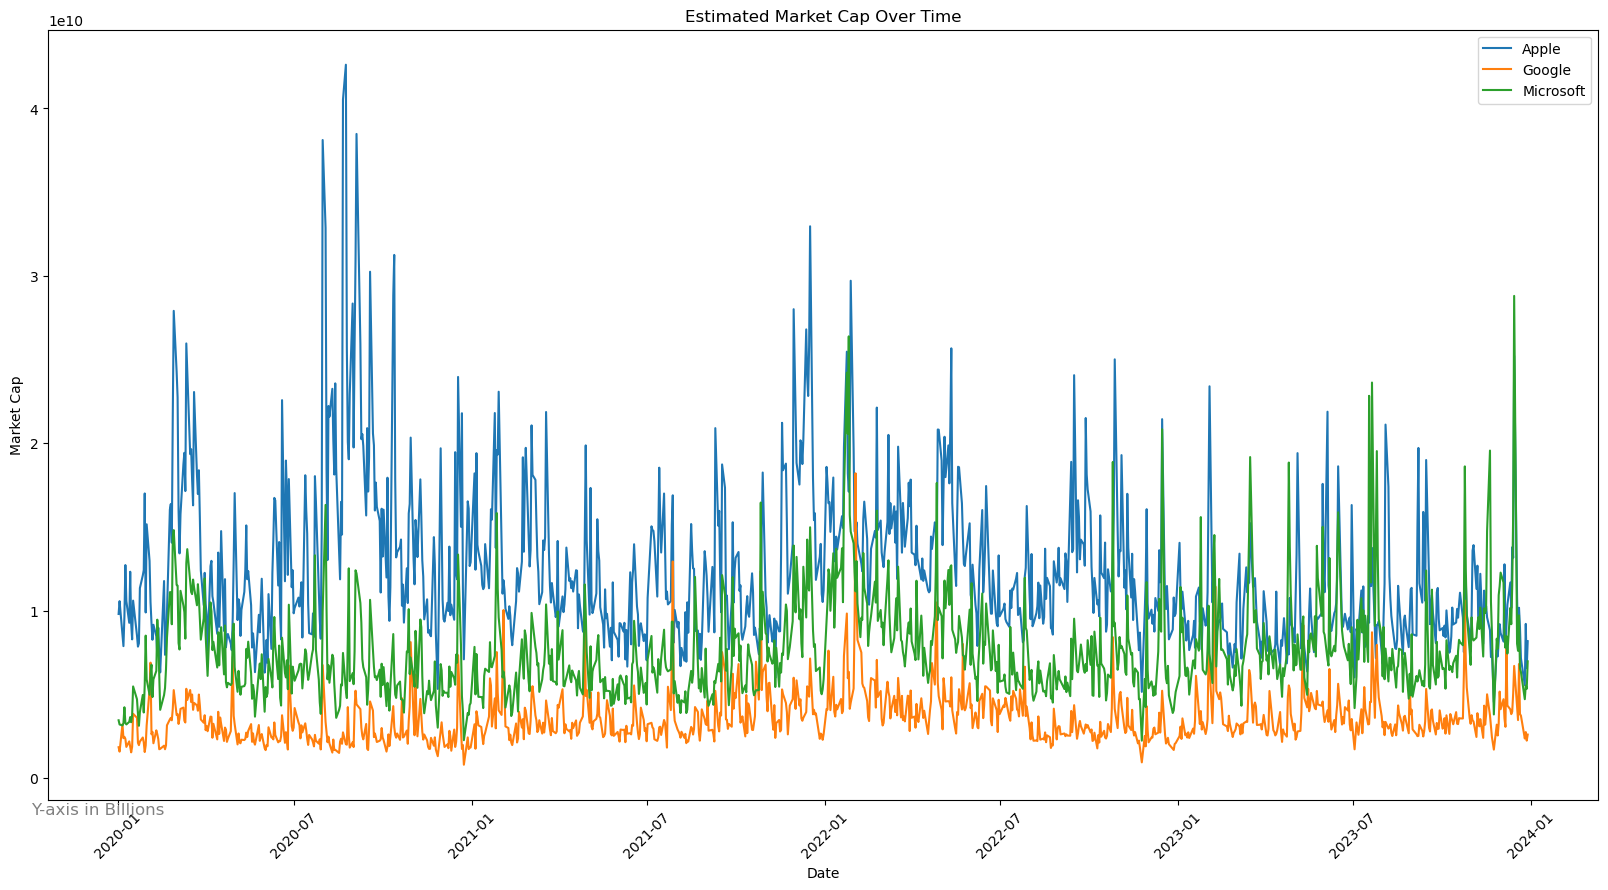

In [20]:
plt.figure(figsize=(20,10))
plt.plot(apple_mcap.index, apple_mcap.values, label='Apple')
plt.plot(google_mcap.index, google_mcap.values, label='Google')
plt.plot(microsoft_mcap.index, microsoft_mcap.values, label='Microsoft')
plt.title('Estimated Market Cap Over Time')
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.xticks(rotation=45)  # Rotate x-axis labels to prevent overlap
# Add the text annotation for the y-axis unit (billions)
plt.figtext(0.15, 0.1, 'Y-axis in Billions', ha='center', va='center', fontsize=12, color='gray')
plt.legend()
plt.show()

*In this case we can see that even tho microsoft has the highest stock price, apple has the more market cap than microsoft which inicate a higher stock price does not necessarily equate to a higher overall market value. The key takeaway is that Apple's market cap reflects its larger overall value, likely due to a combination of its market position, brand recognition, and investor sentiment.*

# Correlation analysis between stocks

In [264]:
#creating single data frame to plot the relationship between each stocks
all_stocks = pd.concat([apple['Open'],microsoft['Open'],google['Open']],axis=1, keys=['Apple', 'Microsoft', 'Google'])

all_stocks.head()

,Apple,Microsoft,Google
Ticker,AAPL,MSFT,GOOGL
Date,,,
2020-01-02,71.799881,151.870762,67.176978
2020-01-03,72.020439,151.430809,67.156555
2020-01-06,71.206085,150.244765,67.337388
2020-01-07,72.672402,152.387251,69.770083
2020-01-08,72.022858,152.014252,69.489097


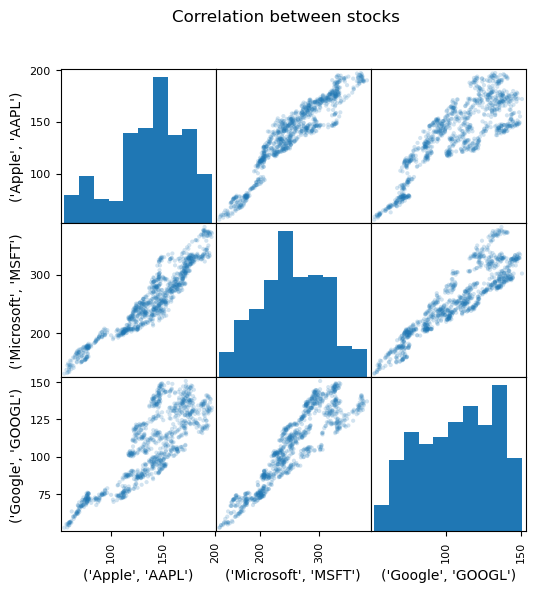

In [134]:
scatter_matrix(all_stocks, figsize=(6, 6), alpha=0.2)
plt.suptitle('Correlation between stocks')
plt.show()

*All three pairs (AAPL vs. MSFT, AAPL vs. GOOGL, MSFT vs. GOOGL) exhibit strong positive correlations, indicating that the stock prices of these companies tend to move together, potentially due to their dominant positions in the tech industry.*

# Basic Financial Analysis 

After basic analysis, let's move onto some of the financial analysis for stock data. First analysis will be Daily Percentage Change. Defined by this formula 

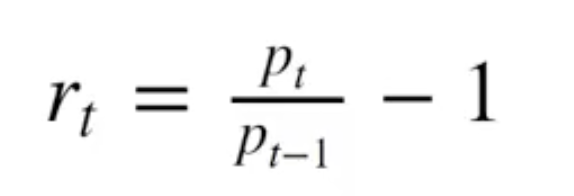

Daily percentage change shows percentage gain or loss if we bought the stock today and sold it the next day.While this isn't necessarily helpful to predict future values of stock, it's helpful in analyzing the volatility of the stock. If daily returns have wide distrbution, the stock is more volatile from one day to the next. 

In [22]:
# can use built in pd tool pct_change, but will use shift() which shift forward or backward
#calculating return formula as expressed above
apple['returns'] = (apple['Close'] / apple['Close'].shift(1)) - 1 

apple['returns'].head()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
Name: returns, dtype: float64

In [24]:
#now let's do for all stocks 
microsoft['returns'] = (microsoft['Close'] / microsoft['Close'].shift(1)) - 1 
google['returns'] = google['Close'].pct_change(1)

Now, let's find the volatility of each stock and see which one is the most volatile. Volatility means how much the price moves up and down over time. Stocks with higher volatility carry more risk, but they also have the potential for higher rewards. Just keep in mind, this is not investment advice.

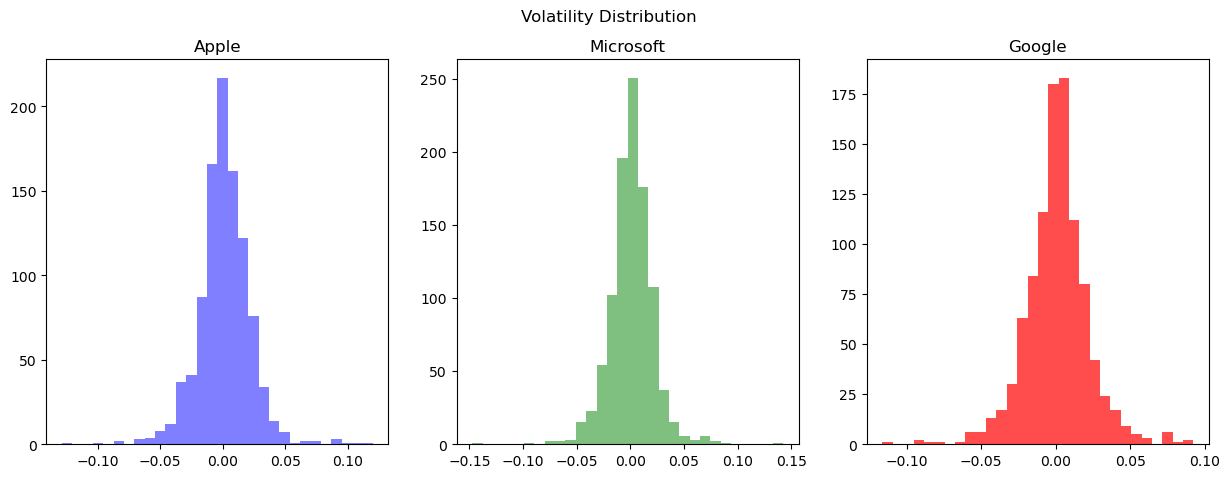

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histograms on the subplots
axs[0].hist(apple['returns'], bins=30, color='blue', alpha=0.5)
axs[0].set_title('Apple')

axs[1].hist(microsoft['returns'], bins=30, color='green', alpha=0.5)
axs[1].set_title('Microsoft')

axs[2].hist(google['returns'], bins=30, color='red', alpha=0.7)
axs[2].set_title('Google')

plt.suptitle('Volatility Distribution')
plt.show()

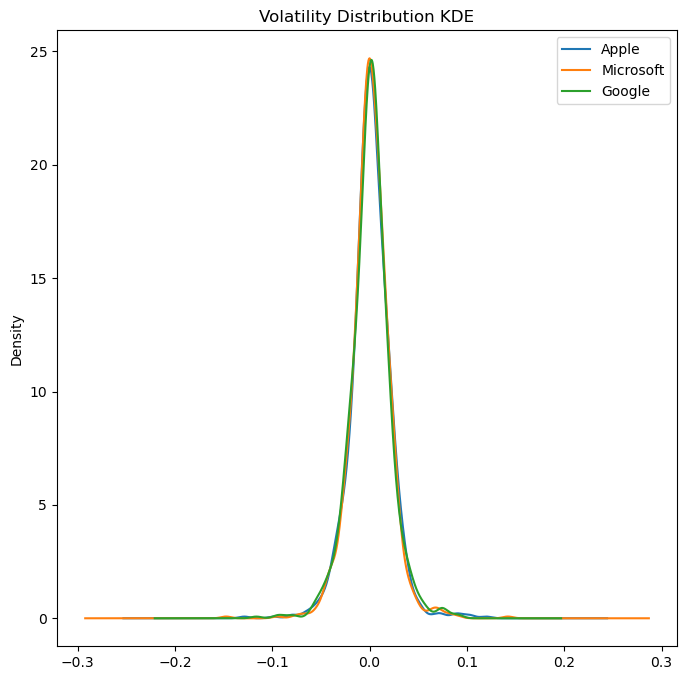

In [31]:
#Overview with kernal density plot

apple['returns'].plot(kind='kde', label='Apple', figsize=(8,8))
microsoft['returns'].plot(kind='kde', label='Microsoft', figsize=(8,8))
google['returns'].plot(kind='kde', label='Google', figsize=(8,8))
plt.title('Volatility Distribution KDE')
plt.legend()
plt.show()

*In this distribution, in terms of volatility range, there’s not much difference between Google and Apple stocks, as both are within a range of approximately -0.1 to 0.1. However, Microsoft has a wider volatility range of ±0.05. When it comes to returns, Google appears to be stronger, as its distribution shows a clear value with more consistent returns. Additionally, Google has a greater risk in terms of value compared to Apple, even though their distributions are somewhat similar.*

*For Microsoft, despite its higher volatility, much of the data is concentrated in the middle, with very few extreme values, indicating that extreme fluctuations are rare.But we can see that there's not much difference in volatility between the stocks. This is probably because of the same asset class.*

*Volatility analysis helps in predicting the risk associated with a specific investment or portfolio. It also serves as the foundation for advanced financial models, such as the Black-Scholes model, which uses volatility to price options.*

# Comparing Daily Returns Between Stocks 

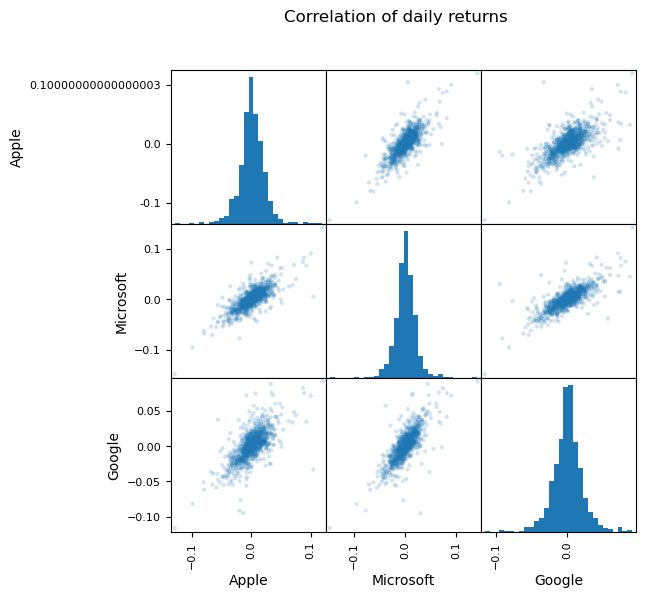

In [205]:
comp_df = pd.concat([apple['returns'],microsoft['returns'],google['returns']],axis=1, keys=['Apple', 'Microsoft', 'Google'])

scatter_matrix(comp_df, figsize=(6,6), alpha=0.2, hist_kwds={'bins':30})
plt.suptitle('Correlation of daily returns')
plt.show();

*Scatter matrix shows that the returns of Apple, Microsoft, and Google are positively correlated. This means that when the return of one company increases (or decreases) on a given day, the returns of the other companies tend to increase (or decrease) as well. It reflects how these companies' stock performances are influenced by similar market factors, leading to a tendency for their returns to move in the same direction.*

# Cumulative Return Analysis

Lastly, let’s focus on cumulative return analysis. Cumulative return represents the total percentage change in an investment’s value over a period of time, starting from its initial value. It shows how much the investment has grown or shrunk overall. The key difference between daily return and cumulative return is that cumulative return highlights the total growth or loss over time, while daily return measures the percentage change from one day to the next.


Luckly pandas covered cumulative return calculation with simple function cumprod().

In [211]:
#cumulative return for each stock

apple['Cumulative return'] = (1 + apple['returns']).cumprod()
google['Cumulative return'] = (1 + google['returns']).cumprod()
microsoft['Cumulative return'] = (1 + microsoft['returns']).cumprod()

apple.head()

Price,Close,High,Low,Open,Volume,returns,Cumulative return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2020-01-02,72.796028,72.856621,71.545395,71.799881,135480400,NaN,NaN
2020-01-03,72.088303,72.851769,71.862900,72.020439,146322800,-0.009722,0.990278
2020-01-06,72.662727,72.701508,70.954017,71.206085,118387200,0.007968,0.998169
2020-01-07,72.320969,72.929314,72.100410,72.672402,108872000,-0.004703,0.993474
2020-01-08,73.484352,73.787315,72.022858,72.022858,132079200,0.016086,1.009456


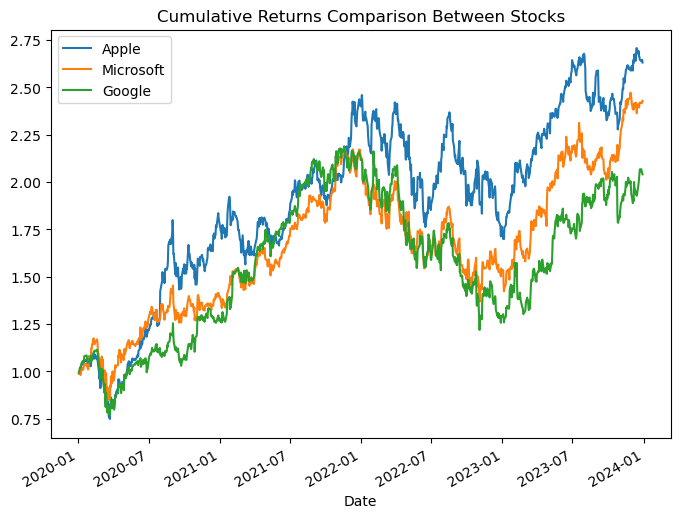

In [217]:
#Let's plot this out 

apple['Cumulative return'].plot(label='Apple', figsize=(8,6))
microsoft['Cumulative return'].plot(label='Microsoft')
google['Cumulative return'].plot(label='Google')
plt.legend()
plt.title('Cumulative Returns Comparison Between Stocks')
plt.show()

*As we can see, Apple outperformed both Microsoft and Google, meaning Apple offers a higher return on investment compared to the other two. Cumulative return is one of the simplest ways to compare the performance of different assets and help decide which one to invest in.*

# Conclusion 

In this project, I analyzed the stocks of Apple, Microsoft, and Google and found some interesting stuff. Even though Microsoft's price is the highest, Apple turns out to be the best choice for investment based on cumulative returns. All three stocks show positive correlations, meaning they tend to move up and down together, probably because they’re in the same asset class and follow overall industry trends. When it comes to volatility, all the stocks have pretty similar distributions, with just a few extremes here and there. Of course, there are a ton of more advanced methods we could use for financial analysis to make even smarter investment decisions, but this gives a solid starting point!